In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import numpy.random as r
from tqdm import tqdm

# Indlæsning af radier

In [11]:
råNGRIP = pd.read_excel('rådata NGRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header = 58, usecols = [0,1,2,3,4,5,6,7,8])
råGRIP = pd.read_excel('GRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header = 54, usecols = [0,1,2,3,4,5,6,7])

NGRIP, GRIP = råNGRIP.to_numpy(), råGRIP.to_numpy()
NGRIPakk0, GRIPakk0 = NGRIP[:, 6], GRIP[:, 5]
NGRIPår0, GRIPår0 = NGRIP[:, 1], GRIP[:, 1]
NGRIP_delevation, GRIP_delevation = NGRIP[:, 8], GRIP[:, 7]

In [3]:
k_acc_værdier = np.load('k_værdier_holocæn.npz')
k_acc_værdier = k_acc_værdier['k_acc_værdier']
print(len(k_acc_værdier))

100


In [4]:
tid = np.load('årstal_holocæn0.npz')
tid = tid['år_list']

In [5]:
R = np.load(f'Radier_holocæn0.npz')
R = R['R_list']
for i in range(1,len(k_acc_værdier)):
    radier = np.load(f'Radier_holocæn{i}.npz')
    radier = radier['R_list']
    R = np.vstack((R, radier))

In [6]:
print(R)

[[432290.41164476 432290.42390709 432294.64669822 ... 549901.02831432
  549901.01956006 549901.0574629 ]
 [432290.41164476 432290.42417565 432294.79454583 ... 553773.88906059
  553773.87982606 553773.91870491]
 [432290.41164476 432290.42489636 432295.19134157 ... 564101.1365096
  564101.12597174 564101.16741084]
 ...
 [432290.41164476 432290.42469146 432295.07853131 ... 561174.83744074
  561174.8272755  561174.86799533]
 [432290.41164476 432290.42354033 432294.44478379 ... 544589.54150403
  544589.53340091 544589.56995097]
 [432290.41164476 432290.42482297 432295.15094032 ... 563054.01026054
  563053.99985631 563054.04103858]]


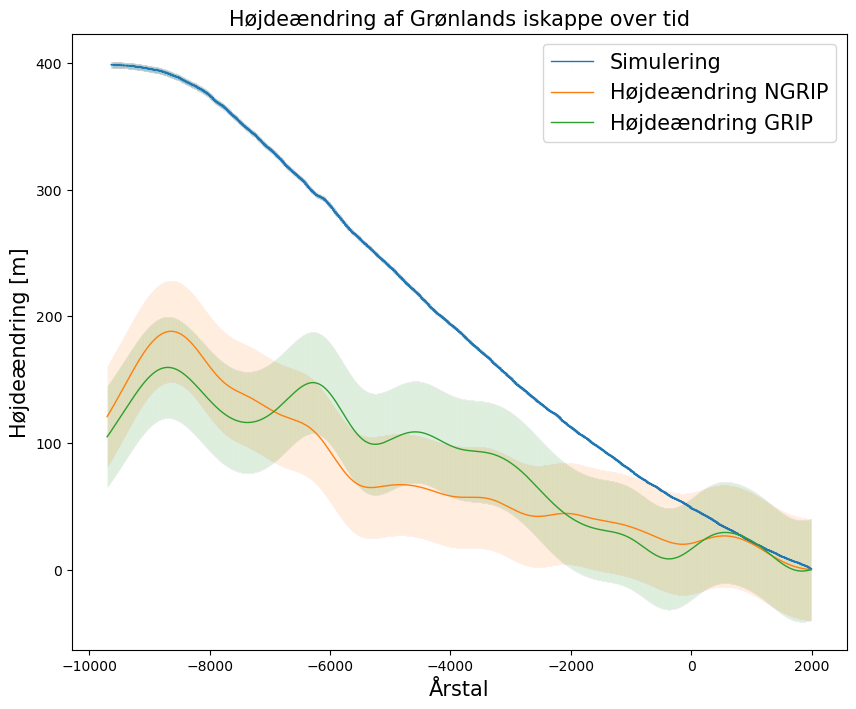

In [35]:
V = 2.99 * 10**15
H = 3 * 10**3            #m
R_0 = (3/16*V/H)**(1/2)          #m
k = H/np.sqrt(R_0) 

H = np.sqrt(R) * k
gns_H = np.mean(H, axis = 0)
sigma_H = np.std(H, axis = 0)/np.sqrt(len(H))
gns_R = np.mean(R, axis=0)
dH = gns_H - gns_H[0]

dhøjde_err_NGRIP = np.ones(len(NGRIP_delevation)) * 40
dhøjde_err_GRIP = np.ones(len(GRIP_delevation)) * 40

plt.figure(figsize = (10,8))
plt.title('Højdeændring af Grønlands iskappe over tid', fontsize = 15)
plt.xlabel('Årstal', fontsize = 15)
plt.ylabel('Højdeændring [m]', fontsize = 15)
markers, caps, bars = plt.errorbar(tid, dH, yerr = sigma_H, linewidth = 1, elinewidth= 0.5, label = 'Simulering')
[bar.set_alpha(0.01) for bar in bars]

markers2, caps2, bars2 = plt.errorbar(NGRIPår0, NGRIP_delevation, yerr = dhøjde_err_NGRIP, linewidth = 1, elinewidth=0.5, label = 'Højdeændring NGRIP')
[bar.set_alpha(0.01) for bar in bars2]
marksers3, caps3, bars3 = plt.errorbar(GRIPår0, GRIP_delevation, yerr = dhøjde_err_GRIP, linewidth = 1, elinewidth=0.5, label = 'Højdeændring GRIP')
[bar.set_alpha(0.01) for bar in bars3]
plt.legend(fontsize = 15)
plt.savefig('Endeligsimulering.png')

In [29]:
print(sigma_H)

[9.09494702e-14 1.79350630e-07 9.87403956e-05 ... 2.28282460e+00
 2.28282433e+00 2.28282483e+00]


# Tjek af højder

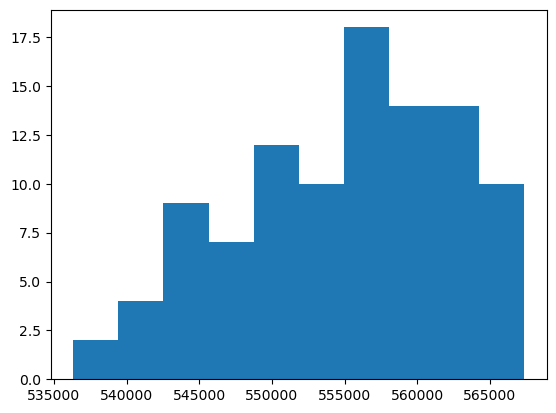

In [8]:
sidste_element = R[:,-1]
plt.hist(sidste_element, bins = 10);

In [34]:
np.linspace()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.397e+03, 3.398e+03,
       3.399e+03])

In [32]:
R.shape

(100, 34000)